<a href="https://colab.research.google.com/github/sherlockian4869/python/blob/main/Analysis/Scraping_Morphological_Analysis_WordCloud_Spreadsheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install mecab-python3
!pip install unidic
!python -m unidic download

download url: https://cotonoha-dic.s3-ap-northeast-1.amazonaws.com/unidic-3.1.0.zip
Dictionary version: 3.1.0+2021-08-31
unidic-3.1.0.zip: 100% 526M/526M [00:41<00:00, 12.6MB/s]
Finished download.
Downloaded UniDic v3.1.0+2021-08-31 to /usr/local/lib/python3.7/dist-packages/unidic/dicdir


In [55]:
import requests
from bs4 import BeautifulSoup

# url = "https://news.google.com/?hl=ja&gl=JP&ceid=JP:ja"
url = "https://news.yahoo.co.jp/topics/domestic"

r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

# elems = soup.find_all('a', class_='DY5T1d')
elems = soup.find_all('div', class_='newsFeed_item_title')

In [56]:
import MeCab
import unidic

news = ''
for e in elems:
  news += e.getText() + '\n'

print(news)

過去最大規模 補正予算が成立
自民 文通費巡り「譲歩案」提示
Xマス頃から強烈寒波 寒い年末
衆院10増10減 議長が異例の批判
建設残土の不適切処理 被害45件
職場接種の前倒し検討 厚労相
「黒い雨」救済 認定1万人超か
診療報酬「本体」を0.43%増へ
NHK値下げ法案再提出へ 総務省
失業給付の保険料増 先送り方針
10万円全額現金望む79% 共同
相次ぐ訃報 焦る拉致被害者家族
ガソリン使い放火 規制に抜け道
火災受け 雑居ビル3万棟調査へ
北陸や東北 雷雨や強雪に注意
追加接種早く受けたい65% 毎日
わいせつ教員 復職を厳格化へ
公明 参院選へ不安材料が続出
年末 さらに強い寒波襲来か
全国の感染者 1カ月ぶり200人超
文通費改革先送り 国会に深い溝
内閣支持率54%に上昇 毎日
雪の勢い落ち着く 路面凍結注意
首相 水際対策を延長する考え
首相 飯塚さんに「申し訳ない」



In [57]:
mecab = MeCab.Tagger('')
node = mecab.parseToNode(news)
words = []
while node:
  hinshi = node.feature.split(',')[0]
  word = node.surface
  if hinshi in ['名詞', '動詞', '形容詞']:
    origin = word
    words.append(origin)

  node = node.next

In [58]:
import collections
count = collections.Counter(words)
# 最も使われている回数が多い単語
print(count)
print(count.most_common(30))

Counter({'10': 3, '増': 3, '万': 3, '文通': 2, '案': 2, '寒波': 2, '年末': 2, '被害': 2, '接種': 2, '1': 2, '先送り': 2, '受け': 2, '雪': 2, '注意': 2, '毎日': 2, '首相': 2, '過去': 1, '最大': 1, '規模': 1, '補正': 1, '予算': 1, '成立': 1, '自民': 1, '巡り': 1, '譲歩': 1, '提示': 1, 'Xマス': 1, '頃': 1, '寒い': 1, '衆院': 1, '減': 1, '議長': 1, '異例': 1, '批判': 1, '建設': 1, '残土': 1, '処理': 1, '45': 1, '件': 1, '職場': 1, '前倒し': 1, '検討': 1, '厚労': 1, '黒い': 1, '雨': 1, '救済': 1, '認定': 1, '診療': 1, '報酬': 1, '本体': 1, '0': 1, '43': 1, 'NHK': 1, '値下げ': 1, '法': 1, '提出': 1, '総務': 1, '失業': 1, '給付': 1, '保険': 1, '方針': 1, '円': 1, '全額': 1, '現金': 1, '望む': 1, '79': 1, '共同': 1, '次ぐ': 1, '訃報': 1, '焦る': 1, '拉致': 1, '家族': 1, 'ガソリン': 1, '使い': 1, '放火': 1, '規制': 1, '抜け道': 1, '火災': 1, '雑居': 1, 'ビル': 1, '3': 1, '棟': 1, '調査': 1, '北陸': 1, '東北': 1, '雷雨': 1, '強': 1, '追加': 1, '早く': 1, '65': 1, '教員': 1, '復職': 1, '公明': 1, '参院': 1, '不安': 1, '材料': 1, '続出': 1, '強い': 1, '襲来': 1, '全国': 1, '感染': 1, 'カ月': 1, '200': 1, '改革': 1, '国会': 1, '深い': 1, '溝': 1, '内閣': 1, '支持': 1, '率': 1, '54': 1, 

In [59]:
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


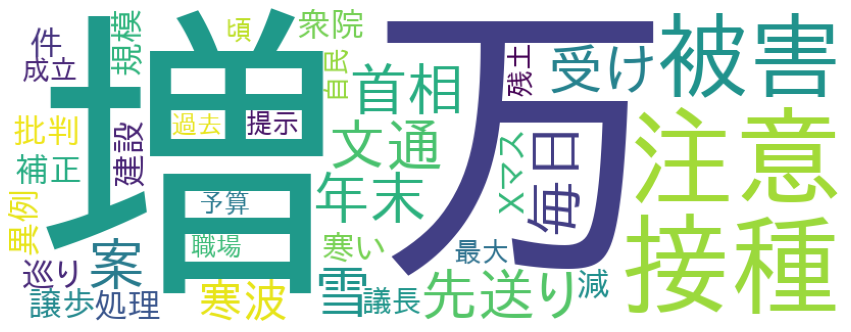

In [60]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random
import codecs
fpath = './fonts/IPAfont00303/ipagp.ttf'

def show_word_cloud(ws):
    ws_show = []
    for i in range(len(ws)):
        word_times = ws[i][1]
        if word_times>0:
            for j in range(word_times):
                ws_show.append(ws[i][0])
    # 綺麗に整列してると、「あああ あああ」という単語と判断されるので、シャッフル
    random.shuffle(ws_show)
    # スペース区切り
    texts = ' '.join(ws_show)
    #print(texts)
    
    # 描画
    wc = WordCloud(background_color="white", font_path=fpath, 
                   width=820, height=312, regexp=r"[\w']+").generate(texts)
    plt.figure(figsize=(15,12))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

show_word_cloud(count.most_common(40))

In [61]:
import gspread
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [63]:
ss_name = 'サンプルシート'
workbook = gc.open(ss_name)
worksheet = workbook.worksheet('シート2')

for string in count.keys():
  worksheet.append_row([string])